In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

In [9]:
df1 = pd.DataFrame({'node':['Denver','Atlanta','Kansas City','Louisville','Detroit','Miami','Dallas','New Orleans'],
                                     'demand':[-600,-400,0,0,200,150,350,300]})
df1

,node,demand
0,Denver,-600
1,Atlanta,-400
2,Kansas City,0
3,Louisville,0
4,Detroit,200
5,Miami,150
6,Dallas,350
7,New Orleans,300


In [10]:
df2 = pd.DataFrame({
    'source':['Denver','Denver','Atlanta','Atlanta','Kansas City','Kansas City','Kansas City','Kansas City','Louisville','Louisville','Louisville','Louisville'],
    'destination':['Kansas City','Louisville','Kansas City','Louisville','Detroit','Miami','Dallas','New Orleans','Detroit','Miami','Dallas','New Orleans'],
    'cost':[2,3,3,1,2,6,3,6,4,4,6,5]})
#pd.merge(left=df2,right=df1,how='left',left_on='source',right_on='source_node')
df2

,source,destination,cost
0,Denver,Kansas City,2
1,Denver,Louisville,3
2,Atlanta,Kansas City,3
3,Atlanta,Louisville,1
4,Kansas City,Detroit,2
5,Kansas City,Miami,6
6,Kansas City,Dallas,3
7,Kansas City,New Orleans,6
8,Louisville,Detroit,4
9,Louisville,Miami,4


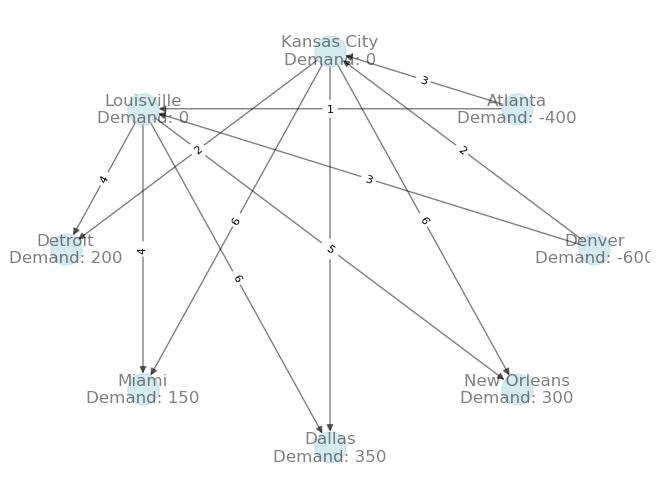

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Create a directed graph (DiGraph)
G = nx.DiGraph()

# Add nodes with demand as node attribute
for _, row in df1.iterrows():
    G.add_node(row['node'], demand=row['demand'])

# Add edges with weights (costs)
for _, row in df2.iterrows():
    G.add_edge(row['source'], row['destination'], weight=row['cost'])

# Create a layout for the nodes
pos = nx.circular_layout(G)

# Draw the nodes with labels (including demand values)
node_labels = {node: f"{node}\nDemand: {G.nodes[node]['demand']}" for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color='lightblue',alpha=0.5)

# Draw the edges with weights as labels
edge_labels = {(edge[0], edge[1]): G[edge[0]][edge[1]]['weight'] for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.show()

In [12]:
G = nx.DiGraph()
# Add nodes with demands
for _, row in df1.iterrows():
    
    G.add_node(row['node'], demand=row['demand'])

# Add edges with weights (costs)
for _, row in df2.iterrows():
    G.add_edge(row['source'], row['destination'], weight=row['cost'])
flowCost,flowDict = nx.network_simplex(G)
print(flowDict)
print(flowCost)

{'Denver': {'Kansas City': 600, 'Louisville': 0}, 'Atlanta': {'Kansas City': 0, 'Louisville': 400}, 'Kansas City': {'Detroit': 200, 'Miami': 0, 'Dallas': 350, 'New Orleans': 50}, 'Louisville': {'Detroit': 0, 'Miami': 150, 'Dallas': 0, 'New Orleans': 250}, 'Detroit': {}, 'Miami': {}, 'Dallas': {}, 'New Orleans': {}}
5200


In [13]:
import pandas as pd

# Convert the flowDict dictionary to a DataFrame
df = pd.DataFrame.from_dict(flowDict, orient='index').fillna(0)

# Reset the index to have 'source' as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'source'}, inplace=True)

# Melt the DataFrame to have 'source', 'destination', and 'flow' columns
df_melted = pd.melt(df, id_vars='source', var_name='destination', value_name='flow')
df_melted=df_melted[df_melted['flow']!=0]
df_melted=pd.merge(left=df_melted,right=df2,how='inner',on=['source','destination'])
df_melted['TotCost']=df_melted['flow']*df_melted['cost']
df_melted

,source,destination,flow,cost,TotCost
0,Denver,Kansas City,600.0,2,1200.0
1,Atlanta,Louisville,400.0,1,400.0
2,Kansas City,Detroit,200.0,2,400.0
3,Louisville,Miami,150.0,4,600.0
4,Kansas City,Dallas,350.0,3,1050.0
5,Kansas City,New Orleans,50.0,6,300.0
6,Louisville,New Orleans,250.0,5,1250.0


In [14]:
df_melted['TotCost'].sum()

5200.0

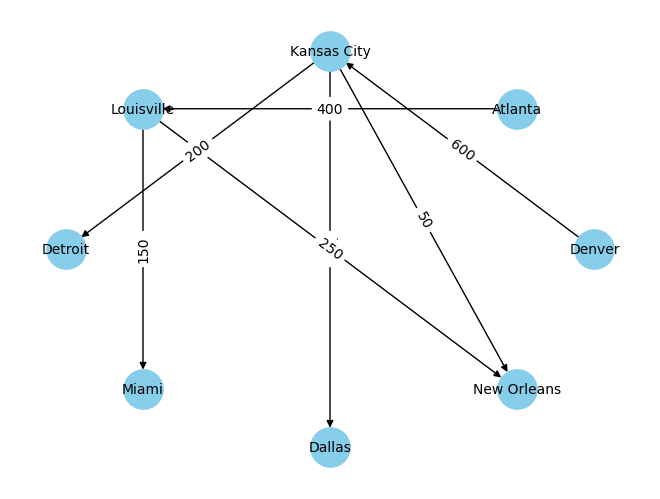

In [17]:
# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
nodes = flowDict.keys()
G.add_nodes_from(nodes)

# Add edges with non-zero values
for source, destinations in flowDict.items():
    for destination, value in destinations.items():
        if value != 0:
            G.add_edge(source, destination, weight=value)

# Draw the graph
pos = nx.circular_layout(G)  # You can choose a different layout if you prefer
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()